<a href="https://colab.research.google.com/github/AMULYA-SRKL/FACE_EYE_DETECTION_USING_WEBCAM/blob/main/Webcam_face_eye_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/opencv/opencv.git

Cloning into 'opencv'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 285512 (delta 8), reused 23 (delta 5), pack-reused 285454
Receiving objects: 100% (285512/285512), 476.12 MiB | 20.93 MiB/s, done.
Resolving deltas: 100% (199402/199402), done.
Checking out files: 100% (6674/6674), done.


In [ ]:

!mkdir Video

In [ ]:
!pip install ffmpeg-python


from IPython.display import HTML, Javascript, display
from google.colab.output import eval_js
from base64 import b64decode
import numpy as np
import io
import ffmpeg

video_file_test = '/content/Video/osy_test.mp4' 
  

VIDEO_HTML = """
<script>
var my_div = document.createElement("DIV");
var my_p = document.createElement("P");
var my_btn = document.createElement("BUTTON");
var my_btn_txt = document.createTextNode("Press to start recording");

my_btn.appendChild(my_btn_txt);
my_div.appendChild(my_btn);
document.body.appendChild(my_div);

var base64data = 0;
var reader;
var recorder, videoStream;
var recordButton = my_btn;

var handleSuccess = function(stream) {
  videoStream = stream;
  var options = {  
    mimeType : 'video/webm;codecs=vp9'  
  };            
  recorder = new MediaRecorder(stream, options);
  recorder.ondataavailable = function(e) {            
    var url = URL.createObjectURL(e.data);
    var preview = document.createElement('video');
    preview.controls = true;
    preview.src = url;
    document.body.appendChild(preview);

    reader = new FileReader();
    reader.readAsDataURL(e.data); 
    reader.onloadend = function() {
      base64data = reader.result;
    }
  };
  recorder.start();
  };

recordButton.innerText = "Recording... press to stop";

navigator.mediaDevices.getUserMedia({video: true}).then(handleSuccess);


function toggleRecording() {
  if (recorder && recorder.state == "recording") {
      recorder.stop();
      videoStream.getVideoTracks()[0].stop();
      recordButton.innerText = "Saving the recording... Please wait!"
  }
}

function sleep(ms) {
  return new Promise(resolve => setTimeout(resolve, ms));
}

var data = new Promise(resolve=>{
recordButton.onclick = ()=>{
toggleRecording()

sleep(2000).then(() => {
  // wait 2000ms for the data to be available
  resolve(base64data.toString())

});

}
});
      
</script>
"""

def start_webcam():
  js = Javascript('''
    async function startWebcam() {
      const div = document.createElement('div');

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      
      return;

    }
    ''')
  
  display(js)
  data = eval_js('startWebcam()')
  
    
start_webcam()

def get_video():
  display(HTML(VIDEO_HTML))
  data = eval_js("data")
  binary = b64decode(data.split(',')[1])
  
  return binary

<IPython.core.display.Javascript object>

In [ ]:
videofile = get_video()

with open(video_file_test, 'wb') as f:
  f.write(videofile)

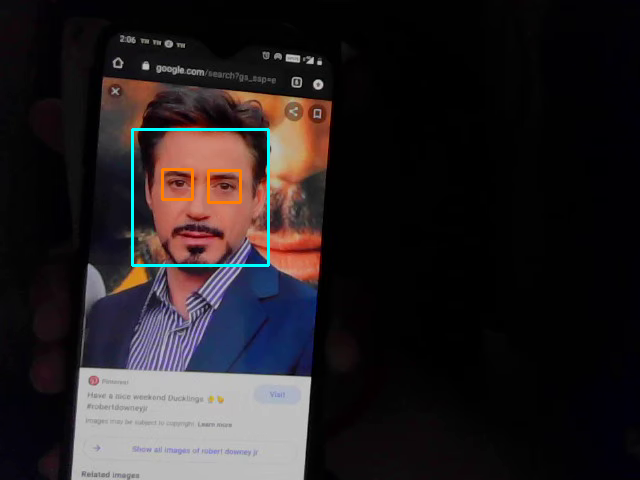

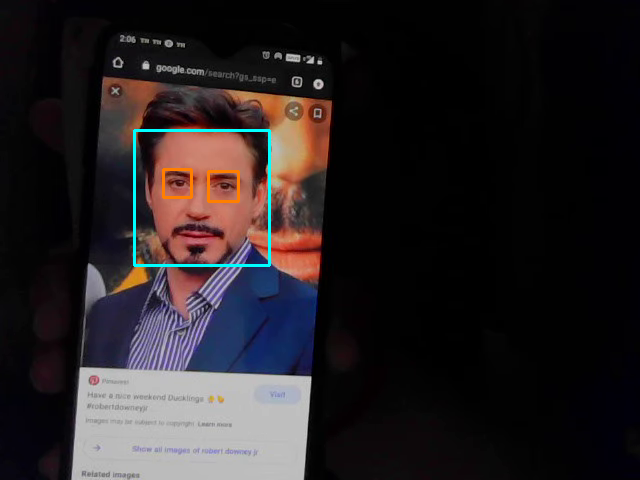

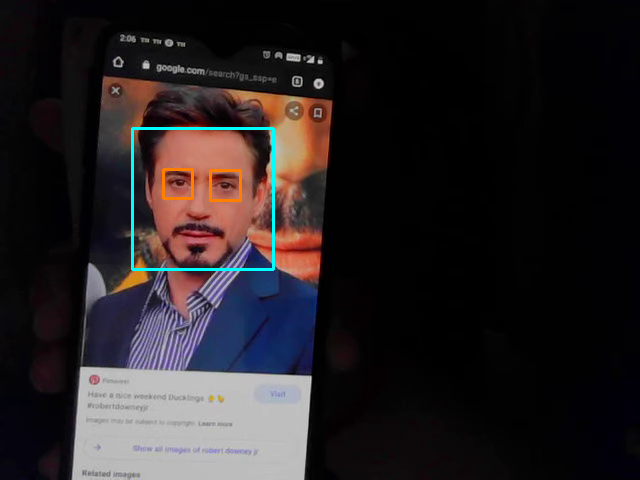

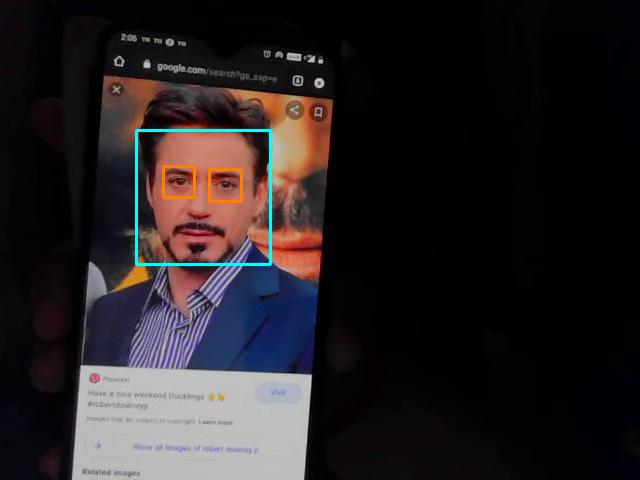

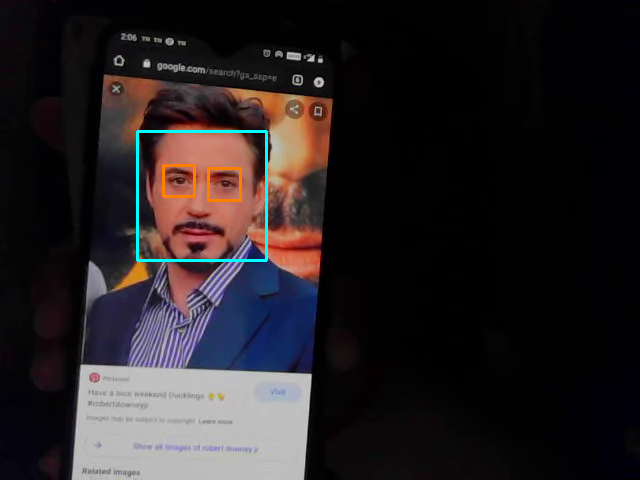

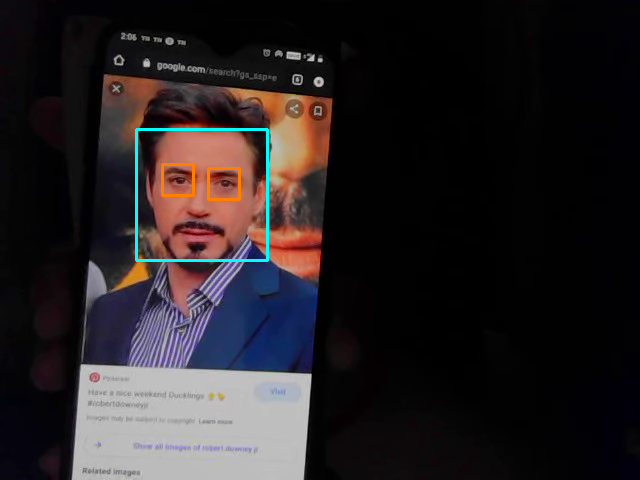

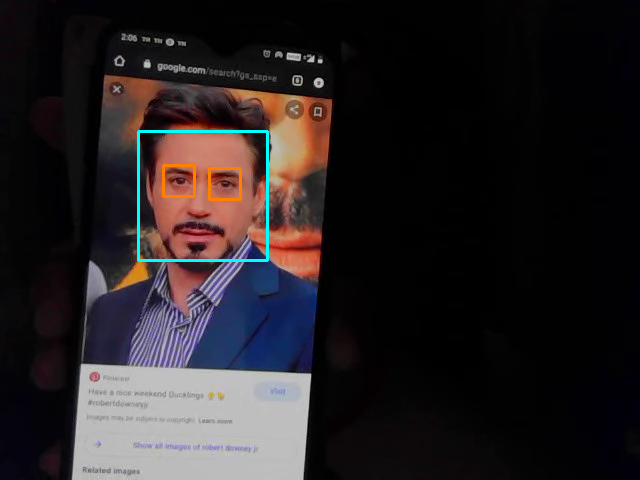

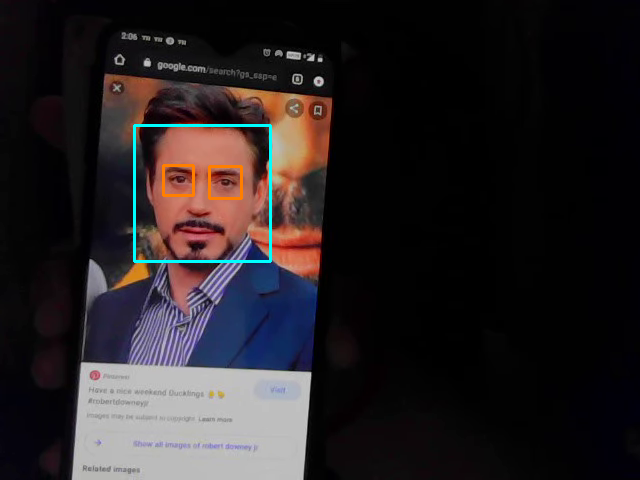

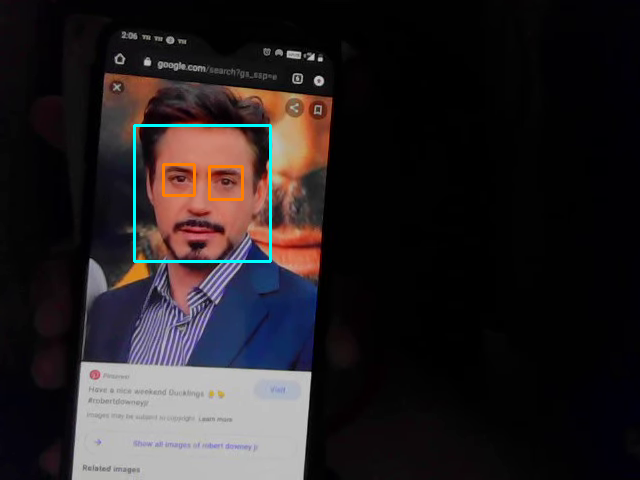

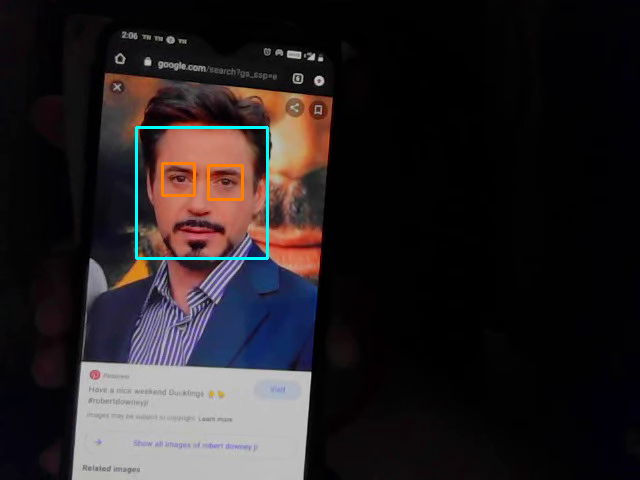

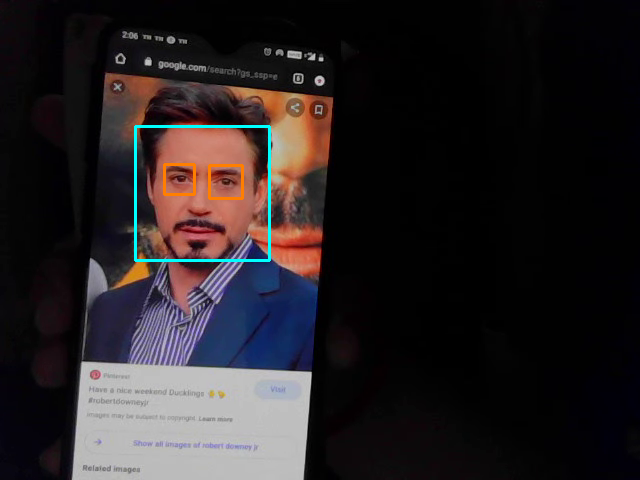

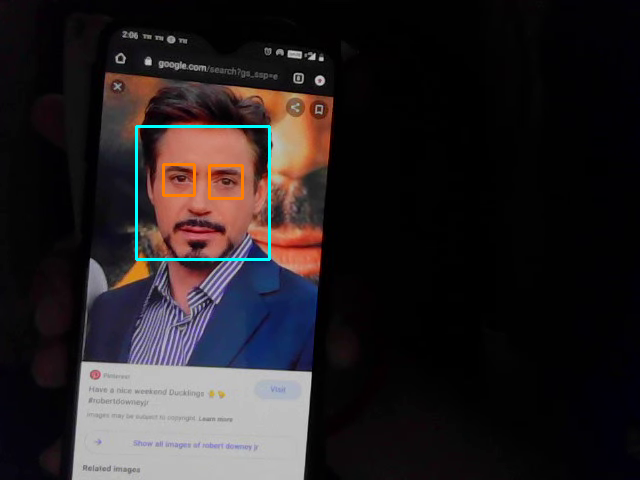

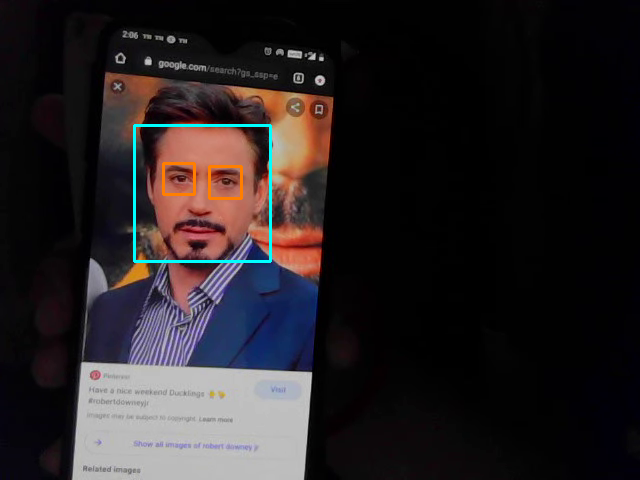

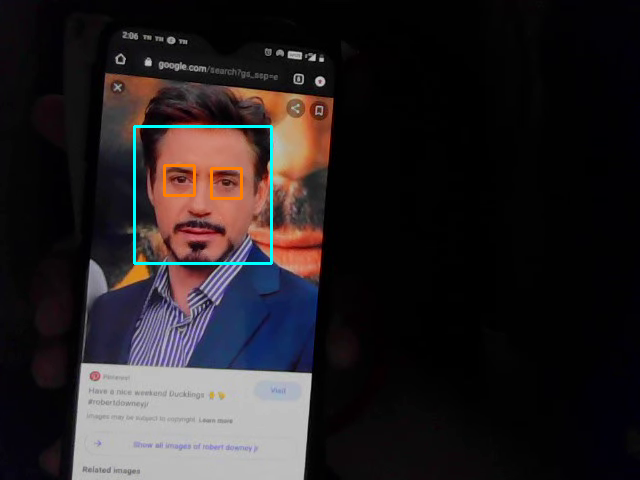

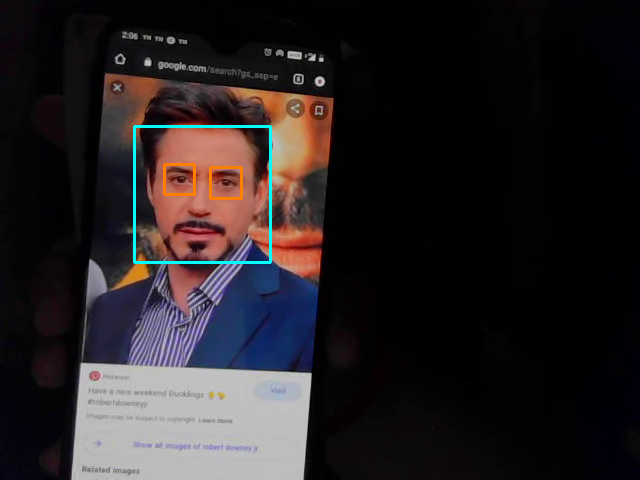

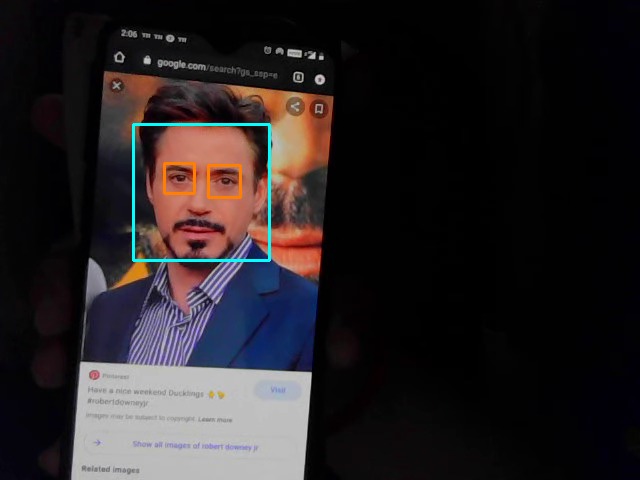

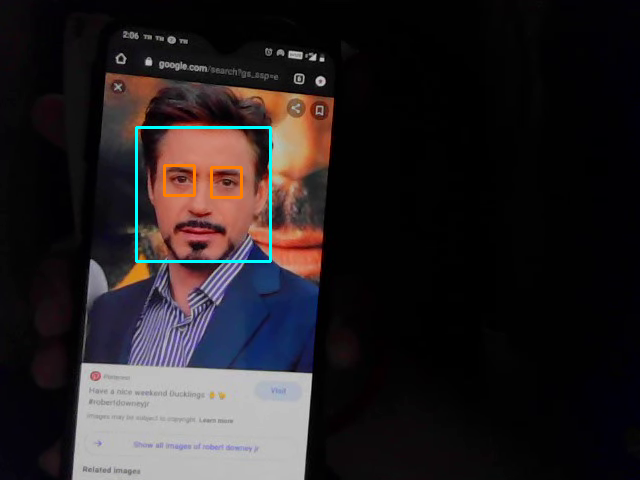

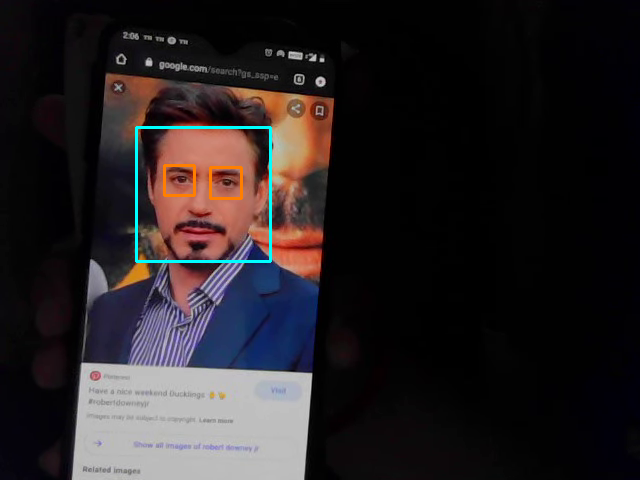

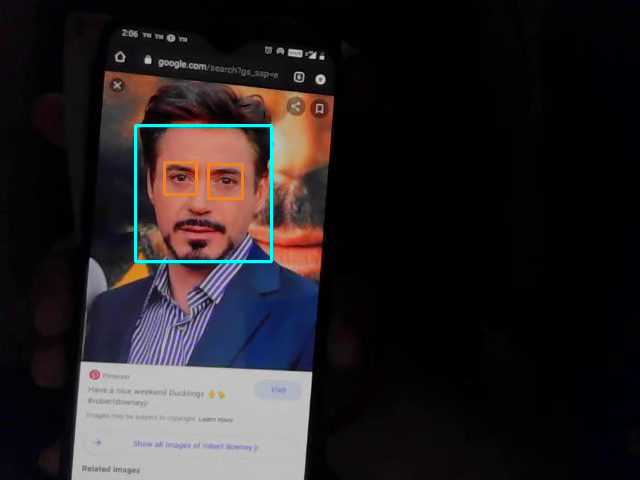

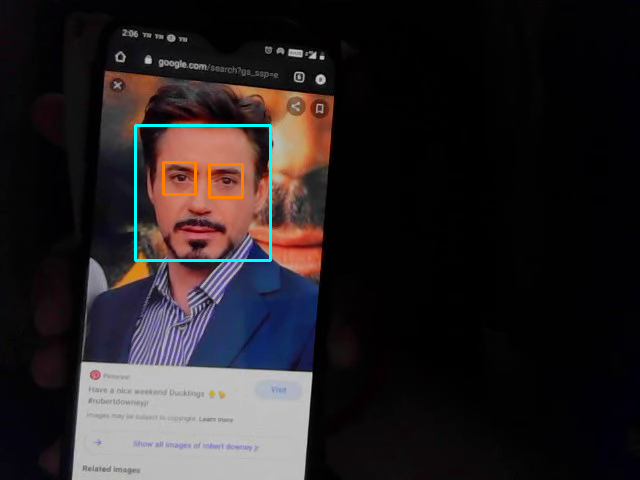

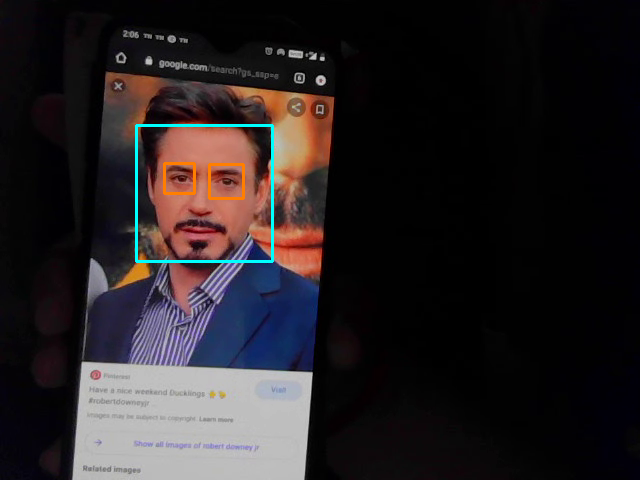

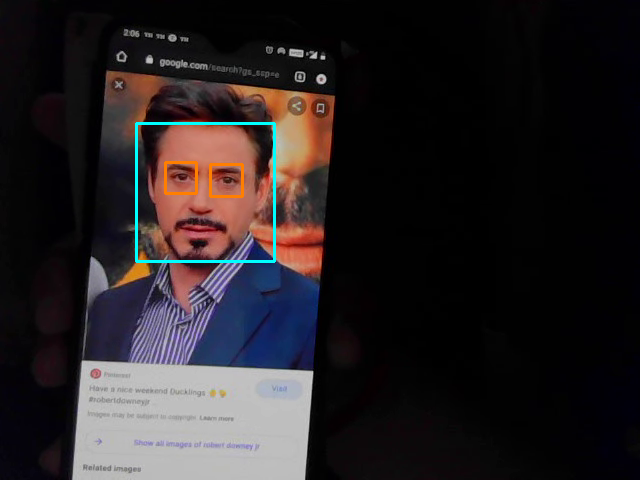

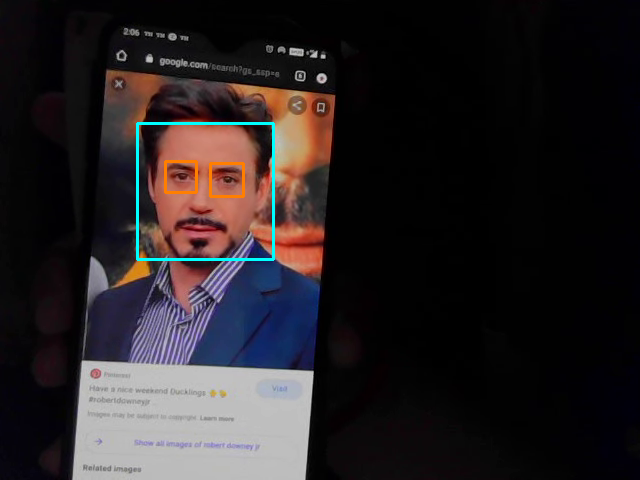

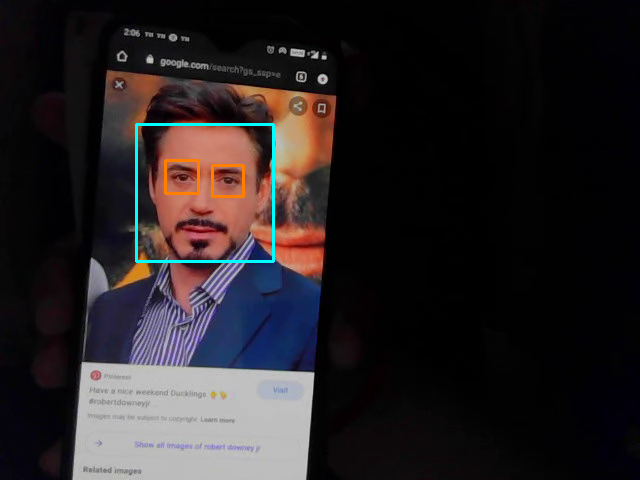

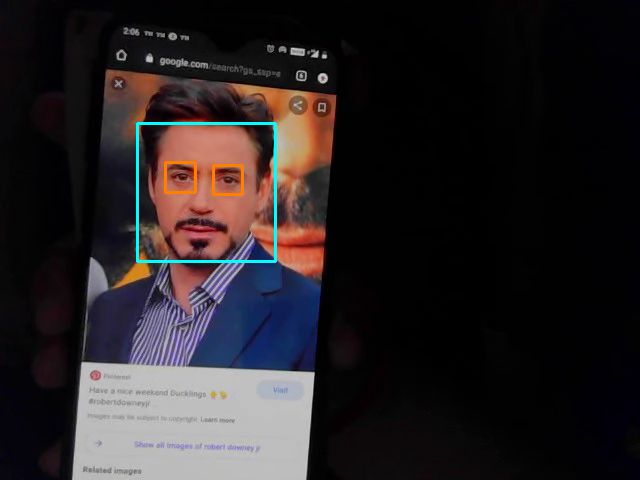

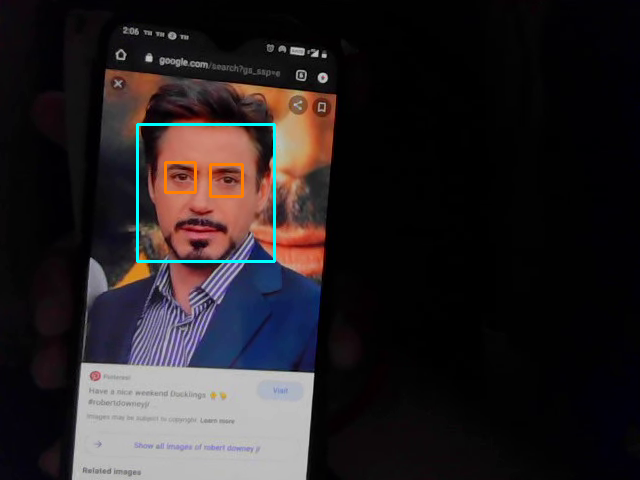

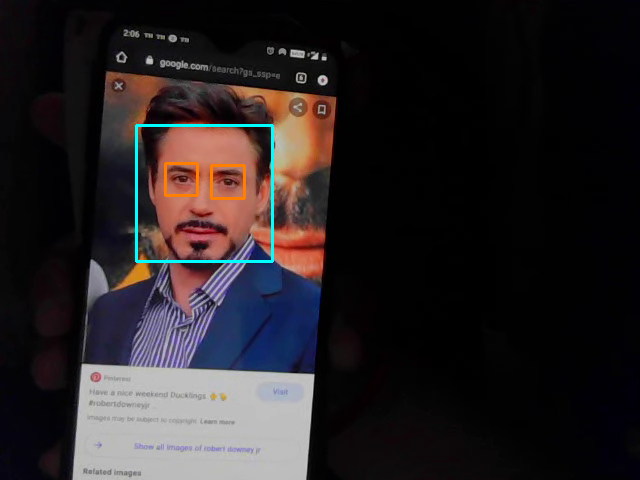

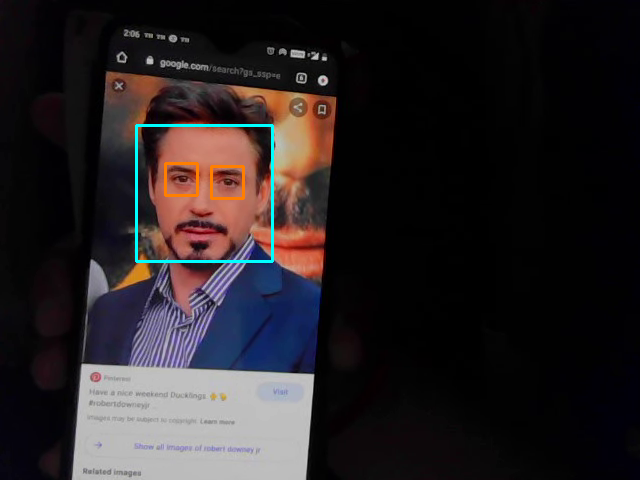

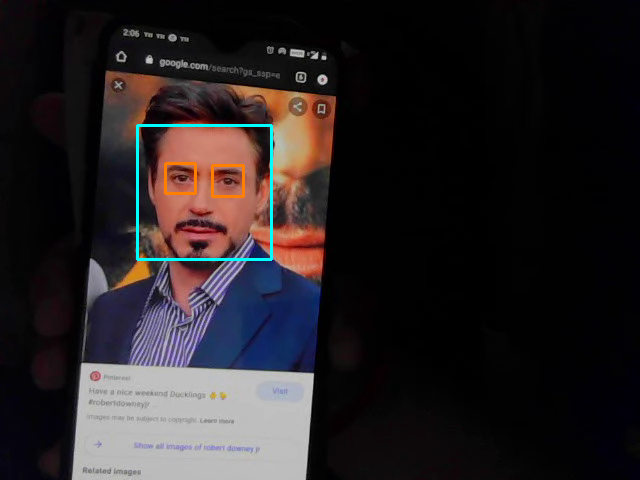

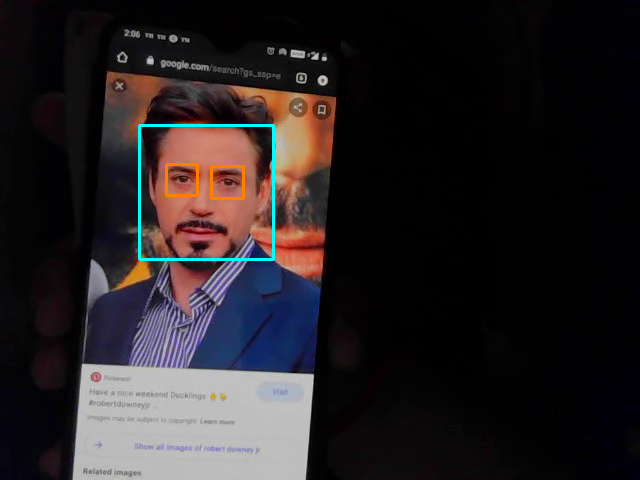

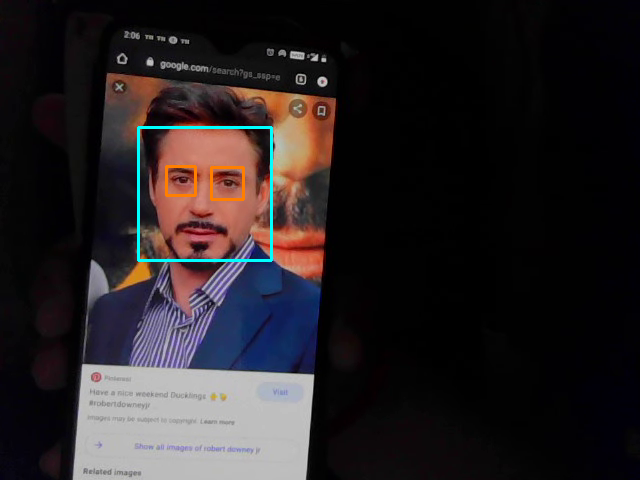

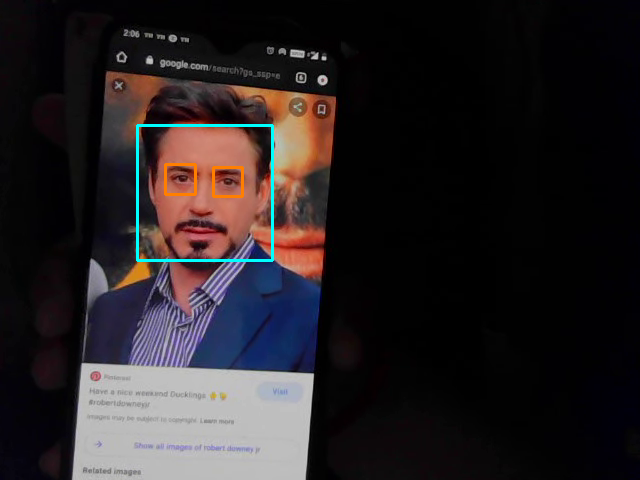

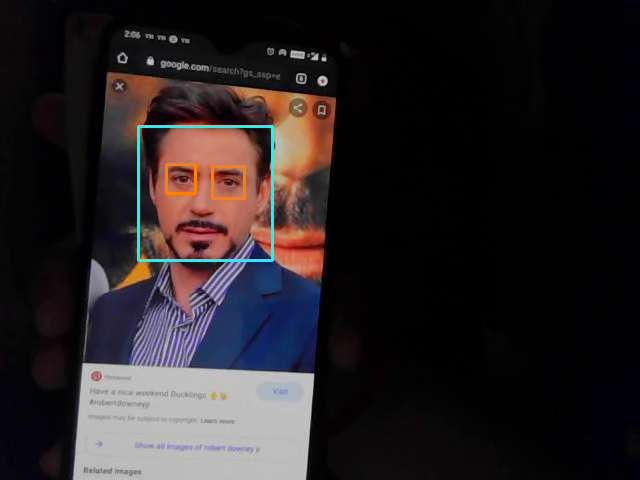

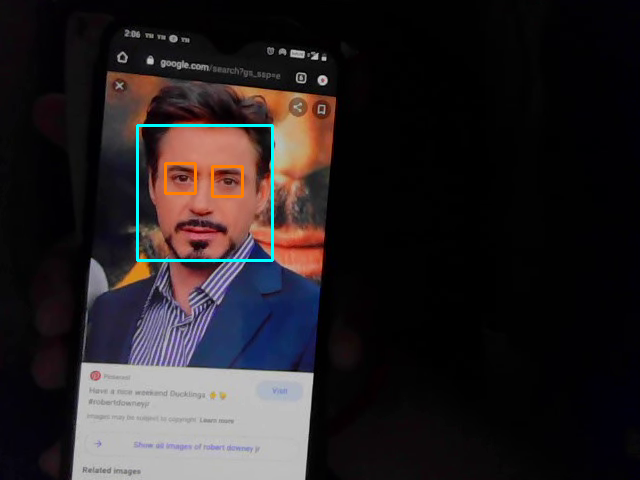

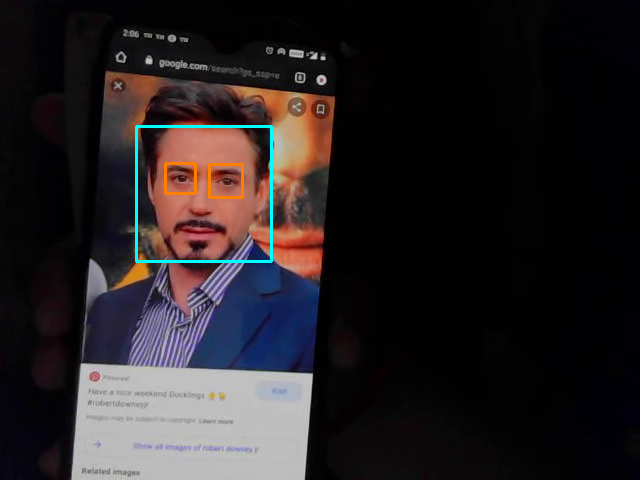

Done


In [ ]:

import cv2  
from google.colab.patches import cv2_imshow

face_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_frontalface_default.xml') 
eye_cascade = cv2.CascadeClassifier('/content/opencv/data/haarcascades/haarcascade_eye.xml')  

cap = cv2.VideoCapture(video_file_test) 
  
count = 1
while cap.isOpened() & count<30:
  
    ret, img = cap.read()  
  
   # gray = cv2.cvtColor(img, cv2.COLOR_BGR2BGR) 
  
    # Detects faces of different sizes in the input image 
    faces = face_cascade.detectMultiScale(img, 1.3, 5) 
  
    for (x,y,w,h) in faces: 
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,0),2)  
       # roi_gray = gray[y:y+h, x:x+w] 
        roi_color = img[y:y+h, x:x+w] 
  
        eyes = eye_cascade.detectMultiScale(roi_color)  
  
        for (ex,ey,ew,eh) in eyes: 
            cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,127,255),2) 
    try:
      cv2_imshow(img)
    except Exception:
      print ("Done") 
      break 
  
    k = cv2.waitKey(30) & 0xff
    if k == 27: 
        break
  
cap.release() 
cv2.destroyAllWindows()